# Step 4: Burger's Equation

Next, we combine what we have learned about convection and diffusion and apply it to the Burger's Equation. This equation looks like &mdash;and is&mdash; the direct combination of both of the PDE's we had been working on earlier.

$$ \frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2} $$

We can discretize it using the methods we have developed previously in steps 1-3. It will take forward difference for the time component, backward difference for space and our 2nd order combination method for hte second derivatives. This yields:

$$ \frac{u^{n+1}_i - u^n_i}{\Delta t} + u_i^n \frac{u^{n}_i - u^n_{i-1}}{\Delta x} =
\nu \frac{u^{n}_{i+1} -2u^n_i + u^n_{i-1}}{\Delta x^2}
$$

Given that we have full initial conditions as before we can solve for our only unknown $u^{n+1}_i$ and iterate through the equation that follows:

$$ u^{n+1}_i = u^n_i - u^n_i \frac{\Delta t}{\Delta x} (u^n_i - u^n_{i-1})  + \frac{\nu \Delta t}{\Delta x^2}(u^{n}_{i+1} - 2u^n_i + u^n_{i-1})
$$

The above equation will now allow us to write a program to advance our solution in time and perform our simulation. As before, we need initial conditions, and we shall continue to use the one we obtained in the previous two steps.

## Initial and Boundary Conditions

The Burger's equation is way more interesting than the previous ones. To have a better feel for its properties it is helpful to use different initial and boundary conditions than what we have been using for the previous steps.

\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
 \phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

This has an analytical solution, given by:
\begin{eqnarray}
u &=& -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 \\\
\phi &=& \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)
\end{eqnarray}

Our boundary conditions will be:

$$ u(0) = u(2 \pi)
$$

This is a periodic boundary condition which we must be careful with.

## Obtaining $ \frac{\partial \phi}{\partial x} $

Evaluating this initial condition by hand would be relatively painful, to avoid this we can calculate the derivative using sympy. This is basically mathematica but can be used to output the results back into Python calculations. 

We shall start by loading all of the python libraries that we will need for hte project along with a fix to make sure sympy prints our functions in latex.



In [1]:
# Adding inline command to make plots appear under comments
import numpy as np
import sympy
import matplotlib.pyplot as plt
import time, sys
%matplotlib inline   

sympy.init_printing(use_latex =True)

We shall start by defining the symbolic variables in our initial conditions and then typing out the full equation.

In [2]:
x, nu, t = sympy.symbols('x nu t')
phi = (sympy.exp(-(x - 4 * t) **2 / (4 * nu * (t+1))) +
       sympy.exp(-(x - 4 *t - 2 * np.pi)**2 / (4 * nu * (t + 1))))
phi

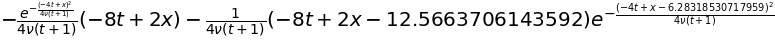

In [3]:
phiprime = phi.diff(x)
phiprime

In python code:

In [4]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


## Lambdifying

Now that we have the expression for $ \frac{\partial \phi}{\partial x} $ we can finish writing the full initial condition equation and then translating it into a usable python expression. To do this we use the lambdify function which takes a sympy simbolic equation and turns it into a callable function.

In [5]:
u = -2 * nu * (phiprime / phi) + 4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 12.5663706143592)*exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 6.28318530717959)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [6]:
ufunc = sympy.utilities.lambdify((t,x,nu), u)
print(ufunc(1,4,3))

3.4917066420644494


Pretty neat right?!

## Solving the Burger's Equation

Now that we can set up the initial conditions we can finish up the problem. We can generate the plot of intiial conditions using the lambifyied function.

In [7]:
#New initial conditions
grid_length = 2
grid_points = 101
nt = 150
dx = grid_length * np.pi / (grid_points - 1) 
nu = .07 
dt = dx * nu #Dynamically scaling dt based on grid size to ensure convergence

#Initiallizing the array containing the shape of our initial conditions
x = np.linspace(0,2 * np.pi, grid_points)
un = np.empty(grid_points)
t = 0

u = np.asarray([ufunc(t,x0,nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

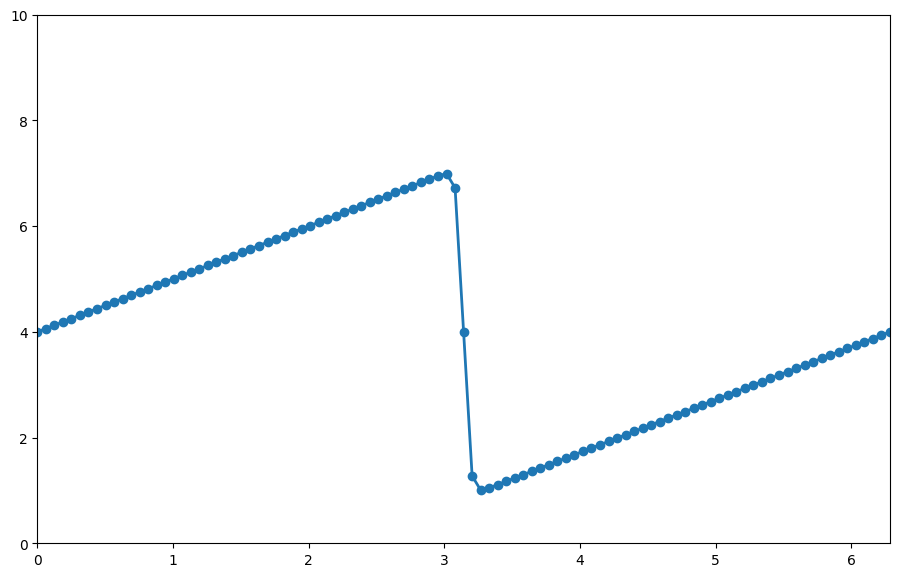

In [8]:
plt.figure(figsize=(11, 7), dpi= 100)
plt.plot(x, u, marker='o', lw=2)
plt.xlim([0, 2 * np.pi])
plt.ylim([0, 10]);

This new function is known as a `sawtooth` function. 

## Periodic boundary conditions

The biggest difference between this step and the previous ones is the use of periodic boundary conditions. If you have experimented with steps 1-2 you would have seen that eventually the wave moves out of the picture to the right and does not show up in the plot. 

With periodic BC, what happens now is that when the wave hits the end of the frame it wraps around and starts from the beginning again.

Now we will apply the discretization as outlined above and check out the final results.

In [9]:
for n in range(nt): #Runs however many timesteps you set earlier
    un = u.copy()   #copy the u array to not overwrite values
    for i in range(1,grid_points-1):
        u[i] = un[i] - un[i] * dt/dx * (un[i]-un[i-1])  + nu * (dt/dx**2) * (un[i+1]- 2*un[i] + un[i-1]) 
        
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu*(dt / dx**2) *(un[1] - 2* un[0] + un[-2])
    u[-1] = u[0]

u_anal = np.asarray([ufunc(nt* dt , xi, nu) for xi in x])

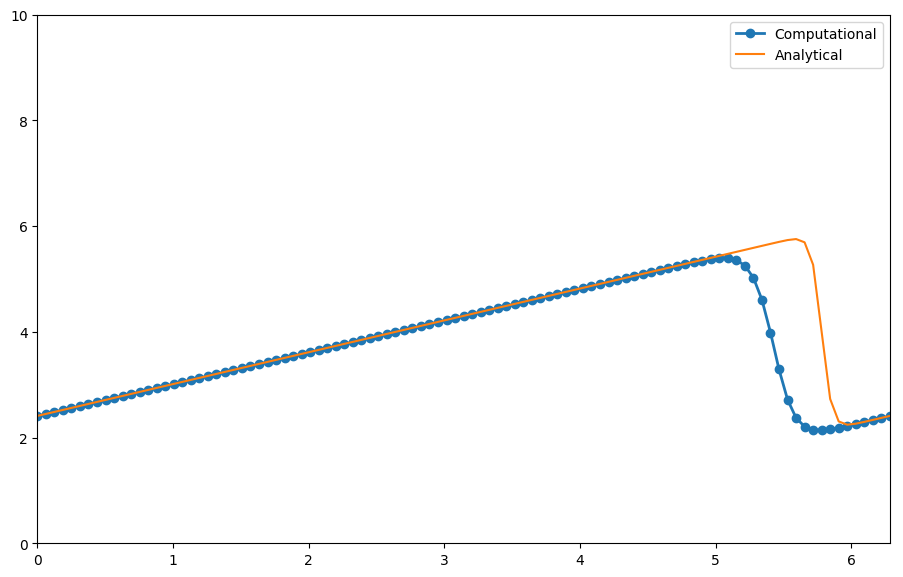

In [10]:
plt.figure(figsize=(11, 7), dpi=100)
plt.plot(x,u, marker ='o', lw=2, label='Computational')
plt.plot(x, u_anal, label='Analytical')
plt.xlim([0, 2* np.pi])
plt.ylim([0,10])
plt.legend();

### Results

Looks pretty Cool! But I would like to know how this evolves over time, not just at its final timestep. As always we will attempt to animate the wave and  take a look at the results.

## Animating the wave moving

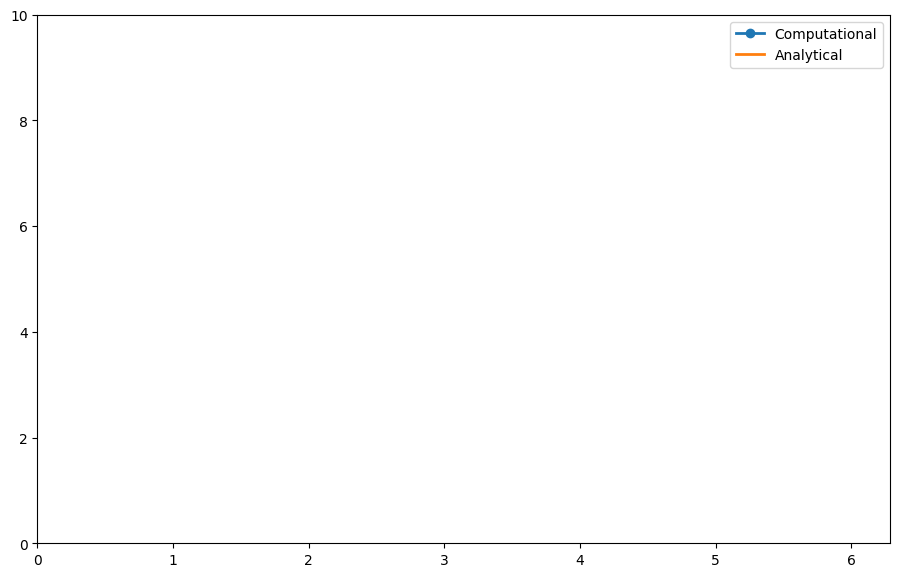

In [11]:
#Imports for animation and display within a jupyter notebook
from matplotlib import animation, rc 
from IPython.display import HTML

#Generating the figure that will contain the animation
fig, ax = plt.subplots()
fig.set_dpi(100)
fig.set_size_inches(11,7)
ax.set_xlim(( 0, 2*np.pi))
ax.set_ylim((0, 10))
comp, = ax.plot([], [], marker='o', lw=2,label='Computational')
anal, = ax.plot([], [], lw=2,label='Analytical')
ax.legend();

#Resetting the U wave back to initial conditions
u = np.asarray([ufunc(0, x0, nu) for x0 in x])

In [12]:
#Initialization function for funcanimation
def init():
    comp.set_data([], [])
    anal.set_data([], [])
    return (comp,anal,)

In [13]:
#Main animation function, each frame represents a time step in our calculation
def animate(j):
    un = u.copy()   #copy the u array to not overwrite values
    for i in range(1,grid_points-1):
        u[i] = un[i] - un[i] * dt/dx * (un[i]-un[i-1])  + nu * (dt/dx**2) * (un[i+1]- 2*un[i] + un[i-1]) 
        
    u[0] = un[0] - un[0] * dt / dx * (un[0] - un[-2]) + nu*(dt / dx**2) *(un[1] - 2* un[0] + un[-2])
    u[-1] = u[0]
    u_anal = np.asarray([ufunc(j * dt, xi, nu) for xi in x])
    comp.set_data(x, u)
    anal.set_data(x, u_anal)
    return (comp,anal,)

In [14]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=nt, interval=20)
HTML(anim.to_jshtml())

## Conclusion

This concludes our examination of 1D sims and boy oh boy was this cool! This last model in particular shines in the animation showing the behavior and properties of the burghers equation quite well. 

Next, we will start our move to 2D  but before this a quick detour on array operations on NumPy.